In [ ]:
!pip install qiskit-machine-learning
!pip install qiskit-machine-learning --upgrade
!pip install qiskit-aer
!pip install qiskit-algorithms


     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 96.8/96.8 kB 2.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 306.9/306.9 kB 10.5 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 133.4/133.4 kB 11.3 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 116.3/116.3 kB 11.9 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 6.3/6.3 MB 16.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.2/2.2 MB 34.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 3.4 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.6/49.6 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 39.4/39.4 MB 13.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 107.5/107.5 kB 8.7 MB/s eta 0:00:00
  Created wheel for fastdtw: filename=fastdtw-0.3.4-cp310-cp310-linux_x86_64.whl size=512583 sha256=8a600f097c71724aa8c1727e93ba3f71245b60d17c3ad2bbc

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
from IPython.display import clear_output
from qiskit import QuantumCircuit
from qiskit.circuit import Parameter
from qiskit.circuit.library import RealAmplitudes, ZZFeatureMap
from qiskit_algorithms.optimizers import COBYLA, L_BFGS_B
from tensorflow.keras.optimizers import Adam
from qiskit_algorithms.utils import algorithm_globals
from qiskit_machine_learning.algorithms.classifiers import NeuralNetworkClassifier, VQC
from qiskit_machine_learning.algorithms.regressors import NeuralNetworkRegressor, VQR
from qiskit_machine_learning.neural_networks import SamplerQNN, EstimatorQNN
from qiskit.circuit import Parameter
from qiskit import QuantumCircuit
from qiskit.circuit.library import ZFeatureMap
from qiskit import BasicAer
from qiskit_machine_learning.algorithms.regressors import VQR
from qiskit.circuit.library import RealAmplitudes, ZFeatureMap
from qiskit.algorithms.optimizers import COBYLA
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
from IPython.display import clear_output
algorithm_globals.random_seed = 42

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

In [ ]:
df = pd.read_csv("/content/drive/MyDrive/Dataset/5G_Service.csv")

In [ ]:
df['Timestamp'] = pd.to_datetime(df['Timestamp'])
df['Signal_Strength'] = df['Signal_Strength'].str.replace(' dBm', '').astype(float)
df['Latency'] = df['Latency'].str.replace(' ms', '').astype(float)
df['Required_Bandwidth'] = df['Required_Bandwidth'].str.replace(' Mbps', '').str.replace(' Kbps', 'e-3').astype(float)
df['Allocated_Bandwidth'] = df['Allocated_Bandwidth'].str.replace(' Mbps', '').str.replace(' Kbps', 'e-3').astype(float)
df['Resource_Allocation'] = df['Resource_Allocation'].str.rstrip('%').astype(float) / 100
object_columns = df.select_dtypes(include='object').columns.tolist()
numerical_columns = df.select_dtypes(include=['int', 'float']).columns.tolist()

print("Object columns:", object_columns)
print("Numerical columns:", numerical_columns)
X = df[['Signal_Strength', 'Required_Bandwidth', 'Allocated_Bandwidth', 'Latency']]
y = df['Resource_Allocation']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X = df[['Signal_Strength', 'Required_Bandwidth', 'Allocated_Bandwidth', 'Latency']].values
y = df['Resource_Allocation'].values


Object columns: ['User_ID', 'Application_Type']
Numerical columns: ['Signal_Strength', 'Latency', 'Required_Bandwidth', 'Allocated_Bandwidth', 'Resource_Allocation']


In [ ]:
num_inputs = 4  # Specify the number of qubits or quantum registers
from qiskit.circuit.library import ZFeatureMap           #Gives RMSE Quantum- 0.42
feature_map = ZFeatureMap(num_inputs)
ansatz = RealAmplitudes(num_inputs, reps=7)

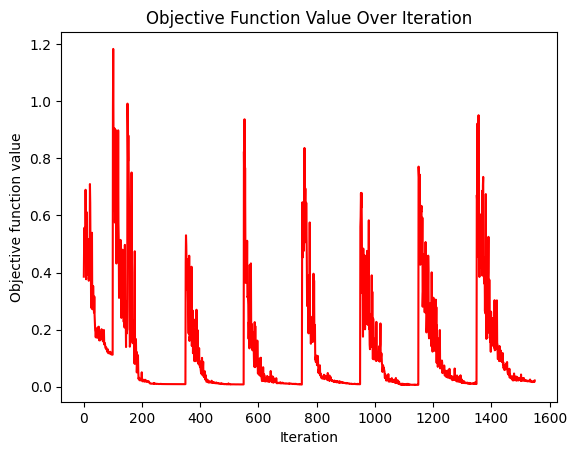

Best MSE: 0.00812441976373298 with 7 repetitions in the ansatz


In [ ]:
from sklearn.feature_selection import SelectKBest, f_regression

# Feature Selection
# Select the best features according to the highest scores
selector = SelectKBest(f_regression, k='all')
X_new = selector.fit_transform(X_scaled, y)

# Split the dataset with selected features
X_train, X_test, y_train, y_test = train_test_split(X_new, y, test_size=0.2, random_state=42)

# Hyperparameter Tuning
# Try a different number of repetitions in the ansatz and optimizer settings
best_mse = new_mse  # Assume the best MSE is the current improved MSE
best_reps = 5
for reps in range(3, 10):  # Trying different values for the number of repetitions
    ansatz = RealAmplitudes(num_inputs, reps=reps)
    vqr = VQR(
        feature_map=feature_map,
        ansatz=ansatz,
        optimizer=COBYLA(maxiter=200, tol=0.0001),  # Adjust the tolerance
        callback=callback_graph,
    )

    # Fit the model on the training data
    vqr.fit(X_train, y_train)

    # Make predictions on the test data
    y_pred = vqr.predict(X_test)

    # Calculate MSE
    current_mse = mean_squared_error(y_test, y_pred)

    # Update best MSE and best reps if current MSE is lower
    if current_mse < best_mse:
        best_mse = current_mse
        best_reps = reps

# Output the best MSE and corresponding number of repetitions
print(f"Best MSE: {best_mse} with {best_reps} repetitions in the ansatz")


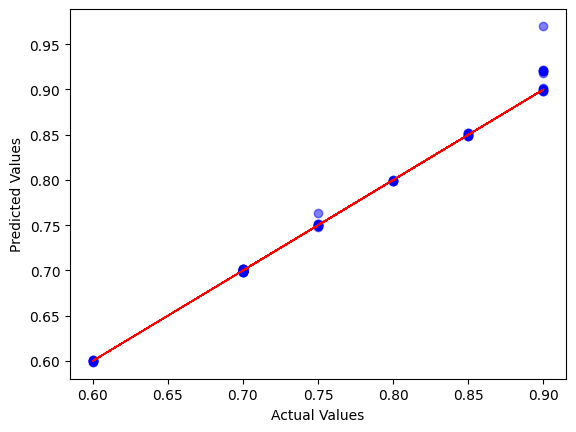

In [ ]:
import matplotlib.pyplot as plt
import numpy as np

# Example data
actual_values = y_test  # Replace with your actual data
predicted_values =y_predict  # Replace with your predicted data

# Calculate the Mean Squared Error (MSE)


# Create the plot
#plt.figure(figsize=(8, 6))
plt.scatter(actual_values, predicted_values, color='blue',alpha=0.5)
plt.plot(actual_values, actual_values, 'r--')  # Identity line

# Annotate with MSE percentage

# Labels and title
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
#plt.title('Predicted vs Actual Values')
plt.savefig("pa2.pdf", bbox_inches='tight', dpi=300)
# Show the plot
plt.show()


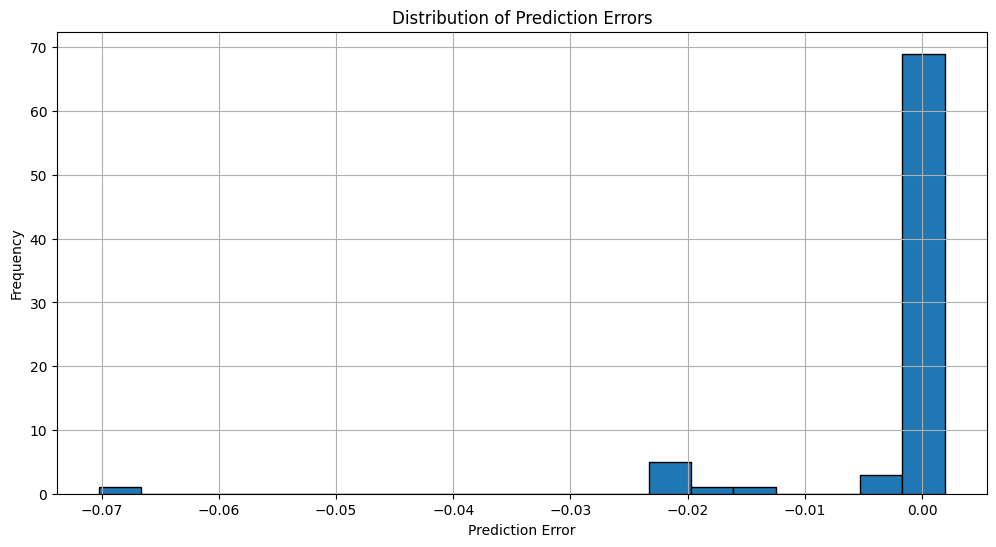

In [ ]:
errors = y_test - y_predict
plt.figure(figsize=(12, 6))
plt.hist(errors, bins=20, edgecolor='black')
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
plt.title("Distribution of Prediction Errors")
plt.grid(True)
plt.show()

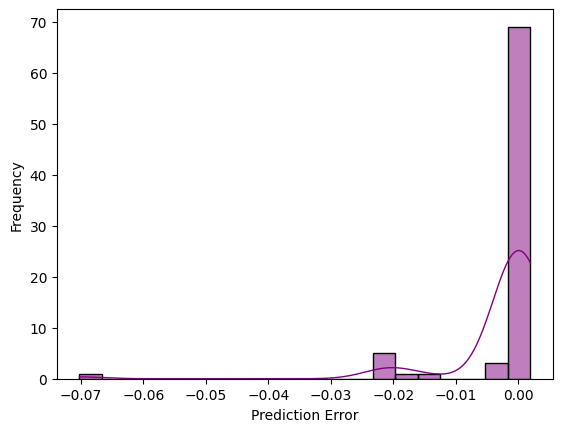

In [ ]:
sns.histplot(errors, bins=20, kde=True, edgecolor='black', color='purple')
plt.xlabel("Prediction Error")
plt.ylabel("Frequency")
#plt.title("Distribution of Prediction Errors")
plt.grid(False)
plt.savefig("Distributionerror.pdf", bbox_inches='tight', dpi=300)
plt.show()